In [6]:
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'
import sys
import os

folder = '../../../../crispy'
print(folder)
if folder not in sys.path: sys.path.append(folder)

from crispy.params import Params
folder = '../../../crispy'
par = Params(folder)

from crispy.tools.initLogger import getLogger
log = getLogger('crispy')
from crispy.IFS import polychromeIFS
from crispy.IFS import reduceIFSMap
from crispy.tools.imgtools import scale2imgs,bowtie
from crispy.tools.image import Image
from crispy.tools.rotate import rotateCube,shiftCube
from crispy.tools.postprocessing import mf,recenter_offaxis
from crispy.tools.inputScene import adjust_krist_header
from crispy.tools.detector import averageDetectorReadout
from astropy.io import fits
import astropy.units as u
from crispy.tools.postprocessing import construct_mflib,convolved_mf


Populating the interactive namespace from numpy and matplotlib
../../../../crispy


In [9]:
lamc=660.
BW = 0.18
par.nonoise=True
sampling=2.0
par.timeframe=1000
par.Nreads = par.timeframe/300
par.PCmode=True
par.lenslet_sampling=1./sampling
# folder = '/Users/mrizzo/IFS/OS5_SIM_'+str(sampling)+'_t2000'
folder = '/Users/mrizzo/IFS/OS5_SIM_'+str(sampling)+'_noiseless'
offaxis_psf_filename='/Users/mrizzo/IFS/OS5/offaxis/spc_offaxis_psf.fits'
OS5_files = '/Users/mrizzo/IFS/OS5/with_lowfc/'

try:
    os.makedirs(folder)
    os.makedirs(folder+'/average')
    os.makedirs(folder+'/detector')  
except OSError:
    pass
par.hdr


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
COMMENT                                                                         
COMMENT ************************************************************            
COMMENT ********************** General parameters ******************            
COMMENT ************************************************************            
COMMENT                                                                         
NLENS   =                  108 / # lenslets across array                        
PITCH   =             0.000174 / Lenslet pitch (meters)                         
INTERLAC=                    2 / Interlacing                                    
PHILENS =    26.565051177077

In [3]:
# from crispy.unitTests import testCreateFlatfield
# testCreateFlatfield(par,pixsize=0.1,npix = 512,Nspec=45,pixval = 1.,useQE=True)
# from crispy.IFS import reduceIFSMap
# reduceIFSMap(par,par.unitTestsOutputs+'/flatfield.fits')


### Reconstruct the matched filter library as needed

In [4]:
# from crispy.tools.postprocessing import construct_mflib
# planet_cube_path = folder+'/average'+"/offaxis_planet_red_optext.fits"
# IWA=2.7
# OWA=9
# plcube = Image(planet_cube_path).data
# ydim = plcube.shape[1]
# xdim = plcube.shape[2]
# mask,scratch = bowtie(plcube[0],ydim//2-1,xdim//2,openingAngle=60,
#             clocking=-par.philens*180./np.pi,
#             IWApix=IWA*lamc/par.lenslet_wav/par.lenslet_sampling,
#             OWApix=OWA*lamc/par.lenslet_wav/par.lenslet_sampling,
#             export=None,twomasks=False)    

# construct_mflib(par,planet_cube=planet_cube_path,
#                 threshold=0.2,
#                 lamc=lamc,
#                 BW=BW,
#                 outdir=folder+'/average',
#                 mask=mask,
#                 trim=30,
#                 outname = 'mflib.fits.gz',
#                 order=3)


In [5]:
from crispy.tools.postprocessing import process_SPC_IFS2

signal, noise,noise_no_source,noise_no_rdi = process_SPC_IFS2(par,
                    psf_time_series_folder=OS5_files,
                    offaxis_psf_filename=offaxis_psf_filename,
                    xshift=0.0,yshift=0.0,
                    lamc=lamc,BW=BW,n_ref_star_imgs=30,
                    tel_pupil_area=3.650265060424805*u.m**2,
                    IWA = 2.7,OWA = 9.,
                    forced_inttime_ref = 50.,
                    pp_fact = 1.00,
                    RDI=True,
                    subtract_dark=False,
                    mflib='',
                    subtract_ref_psf=True,
                    outdir_time_series = folder,
                    outdir_detector=folder+'/detector',
                    outdir_average=folder+'/average',
                    process_cubes=False, # this only needs to be turned to True once
                    process_offaxis_files=False, # Construct planet and other off-axis files
                    process_detector=True, # Construct IFS detector maps
                    take_averages=True,   # Take averages of these detector maps
                    normalize_contrast=False)

crispy - INFO - Read data from HDU 0 of /Users/mrizzo/IFS/OS5/with_lowfc/os5_spc_001.fits
crispy - INFO - X,Y Shift in px in original cubes: 0.00, 0.00
crispy - INFO - Read data from HDU 0 of /Users/mrizzo/IFS/OS5/with_lowfc/os5_spc_031.fits
crispy - INFO - Apply detector readout on os5_spc_001_refstar_IFS.fits
crispy - INFO - Read data from HDU 1 of /Users/mrizzo/IFS/OS5_SIM_2.0_t10000/os5_spc_001_refstar_IFS.fits
crispy - INFO - Writing data to /Users/mrizzo/IFS/OS5_SIM_2.0_t10000/detector/os5_spc_001_refstar_IFS_detector.fits
crispy - INFO - Apply detector readout on os5_spc_002_refstar_IFS.fits
crispy - INFO - Read data from HDU 1 of /Users/mrizzo/IFS/OS5_SIM_2.0_t10000/os5_spc_002_refstar_IFS.fits
crispy - INFO - Writing data to /Users/mrizzo/IFS/OS5_SIM_2.0_t10000/detector/os5_spc_002_refstar_IFS_detector.fits
crispy - INFO - Apply detector readout on os5_spc_003_refstar_IFS.fits
crispy - INFO - Read data from HDU 1 of /Users/mrizzo/IFS/OS5_SIM_2.0_t10000/os5_spc_003_refstar_IFS.

In [6]:
signal

array([ 35.41934857,  30.31419222,  27.52064204,  27.63544773,
        27.43363058,  29.75076121,  30.13647481,  29.64313586,
        27.26101456,  27.62350615,  28.31259297,  26.13610718,
        26.63244187,  28.54011142,  27.09279312,  27.7333783 ,
        28.36086761,  26.80454983,  27.9137988 ])

In [7]:
noise

[1.0588983415478728,
 0.96175197620057085,
 0.92320964687764284,
 0.95045082217689947,
 0.96868656840473322,
 1.0104151824964471,
 1.0367463817700457,
 1.0423328056529844,
 1.0115463969596303,
 1.0097809955536832,
 1.0571562821400426,
 0.94793817975541717,
 0.98835982829271896,
 1.0046403699764828,
 0.9589189973616018,
 1.0074519185208344,
 1.122927785323051,
 0.98469415535967886,
 1.0683695766381645]

In [8]:
noise_no_rdi

[21.79865838310463,
 16.441015247028542,
 16.333932459052718,
 16.858156601441976,
 17.058608206086699,
 17.840200468382438,
 18.804597614584541,
 19.14771655591877,
 19.405523964258627,
 19.925338824258102,
 20.422872474275671,
 21.084285115683343,
 21.962628343680404,
 22.214260595208458,
 22.701021958171715,
 23.254152695288354,
 23.929368857794614,
 26.549360616806055,
 36.47701580765937]

In [9]:
noise_no_source

[0.24454388999292784,
 0.16745393093603245,
 0.1753944484091966,
 0.16278295703605256,
 0.16731484835192767,
 0.17134768333474865,
 0.18094533953915168,
 0.17895242261889713,
 0.19853021733913923,
 0.19382630094683978,
 0.21829554284938746,
 0.18012273517685062,
 0.20420828174943198,
 0.23815172539495344,
 0.21889351114907651,
 0.19831799379223922,
 0.29848990996384583,
 0.21396879247196107,
 0.43425658613829554]

In [10]:
np.savetxt(folder+"/average/signal.txt",signal)
np.savetxt(folder+"/average/noise.txt",noise)
np.savetxt(folder+"/average/noise_no_rdi.txt",noise_no_rdi)
np.savetxt(folder+"/average/noise_no_source.txt",noise_no_source)


crispy - INFO - Reduced cube will have 19 wavelength bins


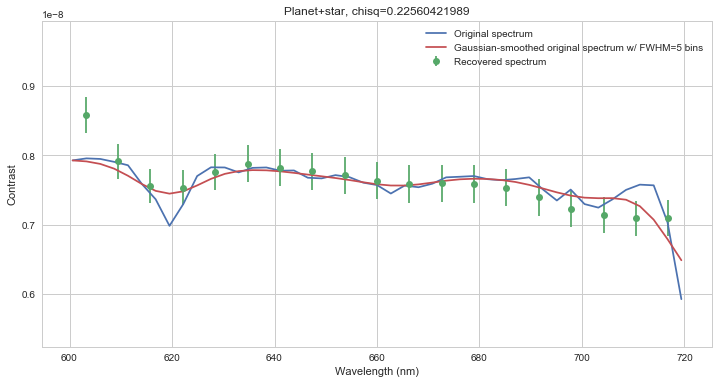

In [10]:
from crispy.tools.postprocessing import SNR_spectrum
from crispy.tools.reduction import calculateWaveList
signal = np.loadtxt(folder+"/average/signal.txt")
noise = np.loadtxt(folder+"/average/noise.txt")
# noise = np.loadtxt(folder+"/average/noise_no_rdi.txt")
# noise = np.loadtxt(folder+"/average/noise_no_source.txt")
lam_midpts,junk = calculateWaveList(par,method='optext')
wavelist = lamc*np.linspace(1.-BW/2.,1.+BW/2.,45)
ratio_out = SNR_spectrum(lam_midpts,signal,noise,lam_contrast=wavelist,outfolder=par.exportDir+"/",
             FWHM=2*45./19.,FWHMdata=2,edges=1,ymargin=0.25,ratio = None)
#np.savetxt(folder+"/average/ratio.txt",ratio_out)



In [12]:
ref_star = fits.getdata(folder+'/average'+'/average_ref_star_detector_red_optext_flatfielded.fits')
target_star_planet = fits.getdata(folder+'/average'+'/average_target_star_detector_red_optext_flatfielded.fits')
target_star = fits.getdata(folder+'/average'+'/average_target_star_nosource_detector_red_optext_flatfielded.fits')
planet = target_star_planet - target_star
rdi_residual = fits.getdata(folder+'/average'+"/lstsq_residual.fits")
trim = 30


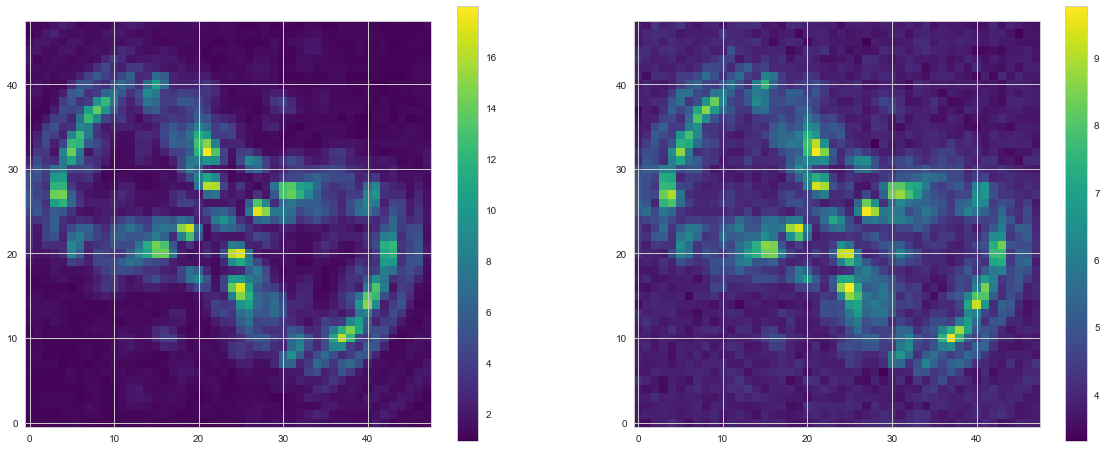

In [13]:
import ipywidgets
def plt_cubes_slices(wchan):
    plt.figure(figsize=(20,8))
    plt.subplot(121)
    plt.imshow(ref_star[wchan-1,trim:-trim,trim:-trim], cmap='viridis')
    plt.colorbar()
    plt.subplot(122)
    plt.imshow(target_star_planet[wchan-1,trim:-trim,trim:-trim], cmap='viridis')
    plt.colorbar()
ipywidgets.interact(plt_cubes_slices, wchan=(1,planet.shape[0]));

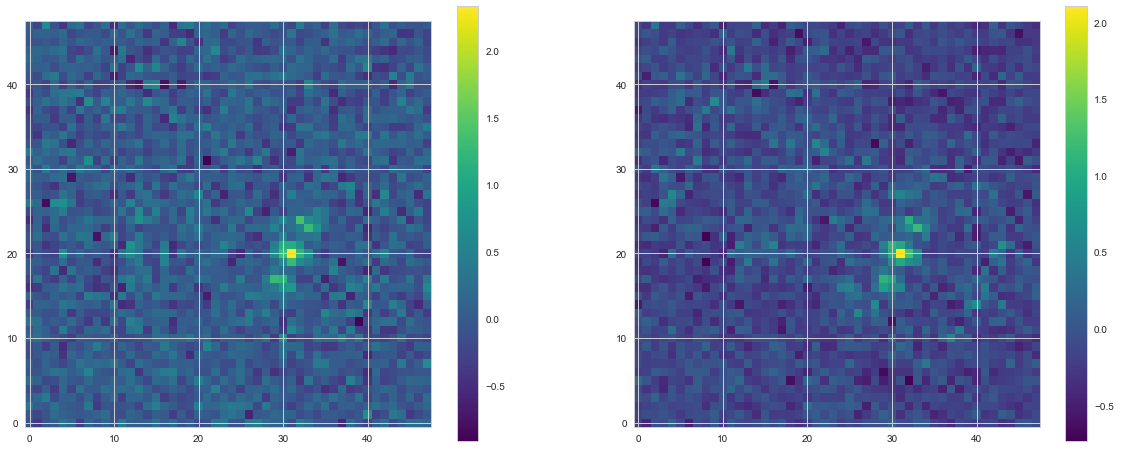

In [14]:
def plt_cubes_slices(wchan):
    plt.figure(figsize=(20,8))
    plt.subplot(121)
    plt.imshow(planet[wchan-1,trim:-trim,trim:-trim], cmap='viridis')
    plt.colorbar()
    plt.subplot(122)
    plt.imshow(rdi_residual[wchan-1,trim:-trim,trim:-trim], cmap='viridis')
    plt.colorbar()
ipywidgets.interact(plt_cubes_slices, wchan=(1,planet.shape[0]));

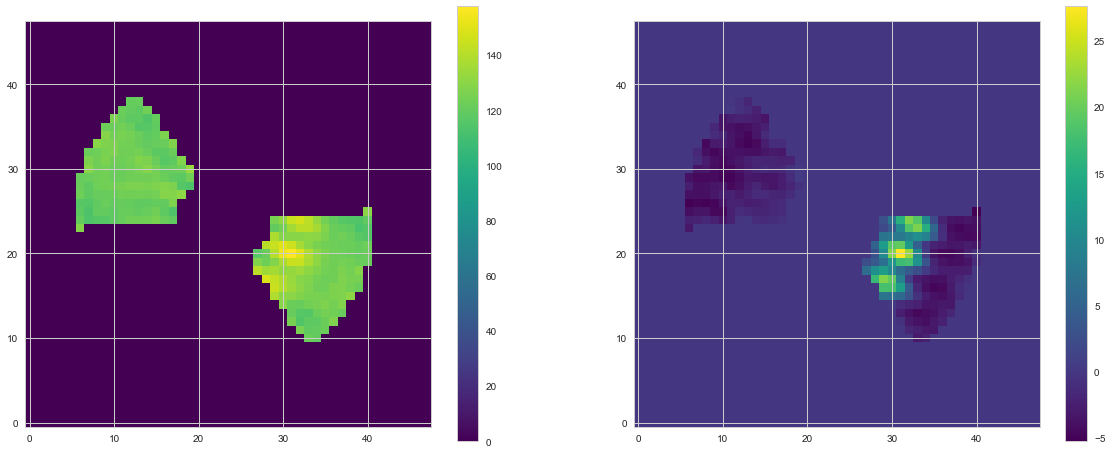

In [15]:
convolved_no_rdi_normalized = fits.getdata(folder+'/average'+'/convolved_no_rdi_normalized.fits')
convolved_normalized = fits.getdata(folder+'/average'+'/convolved_normalized.fits')


def plt_cubes_slices(wchan):
    plt.figure(figsize=(20,8))
    plt.subplot(121)
    plt.imshow(convolved_no_rdi_normalized[wchan-1,trim:-trim,trim:-trim], cmap='viridis')
    plt.colorbar()
    plt.subplot(122)
    plt.imshow(convolved_normalized[wchan-1,trim:-trim,trim:-trim], cmap='viridis')
    plt.colorbar()
ipywidgets.interact(plt_cubes_slices, wchan=(1,planet.shape[0]));

<Container object of 3 artists>

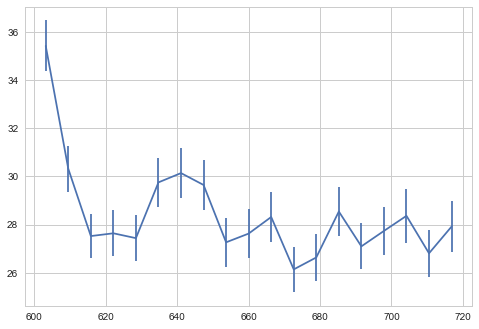

In [16]:
plt.errorbar(lam_midpts,signal,yerr=noise)